## Model: 1

### Necessary Imports

In [1]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import pandas as pd 
import os
import random
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image

import tensorflow as tf
import keras
from keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Visualizing 1 image (both horse and human) from training and testing sets.

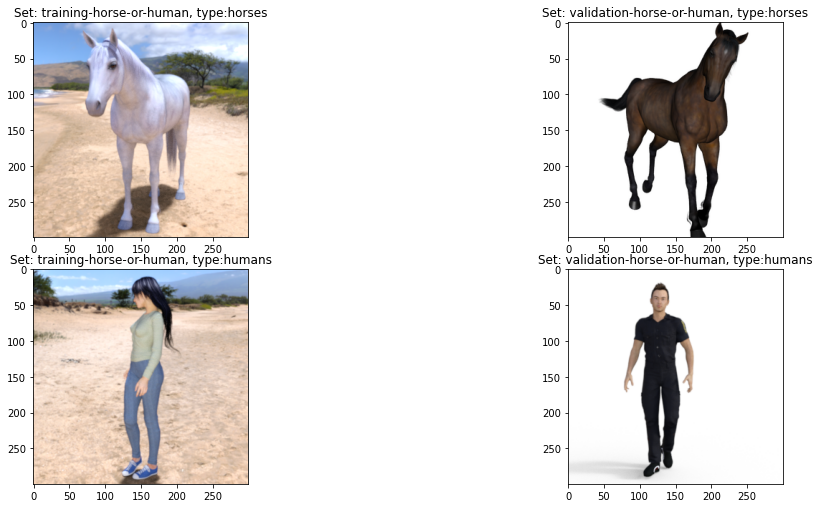

In [3]:
input_path = '/content/drive/MyDrive/Colab Notebooks/AI'

fig, ax = plt.subplots(2, 2, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['training-horse-or-human', 'validation-horse-or-human']):
    set_path = input_path+'/'+_set
    ax[i].imshow(plt.imread(set_path+'/horses/'+os.listdir(set_path+'/horses')[0]), cmap='gray')
    ax[i].set_title('Set: {}, type:horses'.format(_set))
    ax[i+2].imshow(plt.imread(set_path+'/humans/'+os.listdir(set_path+'/humans')[0]), cmap='gray')
    ax[i+2].set_title('Set: {}, type:humans'.format(_set))

### Importing Model

In [4]:
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))

In [5]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [6]:
DATA_DIR = ("/content/drive/MyDrive/Colab Notebooks/AI")

In [7]:
from sklearn.linear_model import LogisticRegression
import os
import glob
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [8]:
def preprocess(X):
    X = np.expand_dims(X, axis=0)
    X = preprocess_input(X)
    return X[0]

In [9]:
os.chdir(os.path.join(DATA_DIR,'validation-horse-or-human','horses'))

horses_test_img_names = glob.glob("*.png")

horses_test = []
for i in horses_test_img_names:
    im = load_img(i, target_size=(299,299,3))
    horses_test.append(preprocess(im))

os.chdir(os.path.join(DATA_DIR,'validation-horse-or-human','humans'))

humans_test_img_names = glob.glob("*.png")

humans_test = []
for i in humans_test_img_names:
    im = load_img(i, target_size=(299,299,3))
    humans_test.append(preprocess(im))
    
os.chdir(os.path.join(DATA_DIR,'training-horse-or-human','horses'))

horses_train_img_names = glob.glob("*.png")

horses_train = []
for i in horses_train_img_names:
    im = load_img(i, target_size=(299,299,3))
    horses_train.append(preprocess(im))

os.chdir(os.path.join(DATA_DIR,'training-horse-or-human','humans'))

humans_train_img_names = glob.glob("*.png")

humans_train = []
for i in humans_train_img_names:
    im = load_img(i, target_size=(299,299,3))
    humans_train.append(preprocess(im))


humans_test = np.array(humans_test, dtype='float32')
horses_test = np.array(horses_test, dtype='float32')
humans_train = np.array(humans_train, dtype='float32')
horses_train = np.array(horses_train, dtype='float32')

In [10]:
train = np.concatenate((humans_train,horses_train),axis=0)

In [11]:
y = [0]*humans_train.shape[0] + [1]*horses_train.shape[0]

In [12]:
y = np.array(y, dtype='float32')

In [13]:
train_features = model.predict(train)

In [14]:
train_features.shape  #there are 2048 features extracted for every image in train set

(1027, 2048)

In [15]:
train_features[0]

array([0.87188184, 0.162596  , 0.75432265, ..., 0.01254063, 0.95303375,
       0.42047572], dtype=float32)

### Logistic Regression

In [16]:
clf = LogisticRegression()

In [17]:
clf.fit(train_features,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
test = np.concatenate((humans_test,horses_test), axis =0)
y_test = [0]*humans_test.shape[0] + [1]*horses_test.shape[0]
y_test = np.array(y_test)

In [19]:
test_features = model.predict(test)

In [20]:
test_features.shape

(256, 2048)

### Making Predictions

In [21]:
preds = clf.predict(test_features)

In [22]:
preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [23]:
(preds == y_test).sum()/y_test.shape[0]

1.0

In [24]:
from sklearn import metrics
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

### Confusion Matrix

In [25]:
def confusion_matrix(actual,predicted):
    cm=metrics.confusion_matrix(actual, predicted,[1,0])
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Humans','Horse'],yticklabels=['Humans','Horse'])
    plt.ylabel('Actual labels')
    plt.xlabel('Predicted Labels')

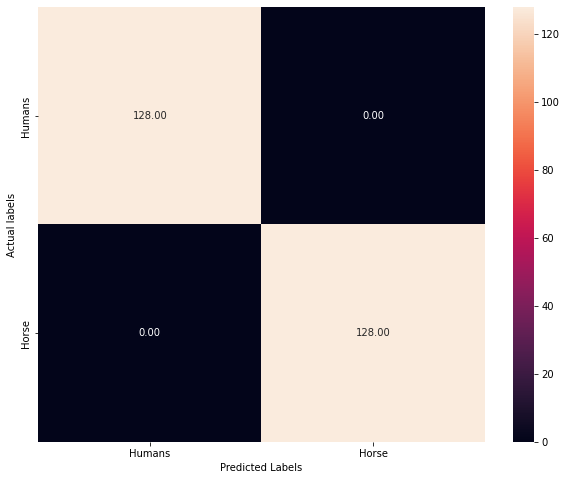

In [26]:
confusion_matrix(y_test, preds)

Here we can see that type 1 & type 2 Error are 0

### Classification Report


In [27]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       128

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



Here we can see that everything is 1. It is a perfect model. It has no **Misclassification**

### ROC Curve

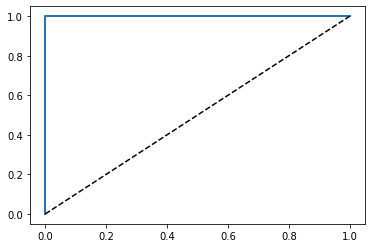

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,preds)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
 

plot_roc_curve(fpr, tpr)
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test,preds)

print(auc_score)

1.0


AUC score is 1, which is the best score a model can get.

In [30]:
train = np.concatenate((humans_train,horses_train),axis=0)

## Model: 2

In [31]:
train_path = '/content/drive/MyDrive/Colab Notebooks/AI/training-horse-or-human'
test_path = '/content/drive/MyDrive/Colab Notebooks/AI/validation-horse-or-human'

In [32]:
def load_and_process_data(directory):
    images = []
    labels = []

    for root, dirs, files in os.walk(directory):
        f = os.path.basename(root)
        for file in files:
            
            try:
               
                img = cv2.imread(root+'/'+file)
                
                img = cv2.resize(img, (300,300))
                
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                img = cv2.GaussianBlur(img, (5,5), 0)
                
                images.append(img)
                
                labels.append(f)
                
            
            except Exception:
                print('Error could not load all images')
    
    
    images = np.array(images)
    
    return (images, labels)

In [33]:
train_images, train_labels = load_and_process_data(train_path)
valid_images, valid_labels = load_and_process_data(test_path)

In [34]:
def preprocess_labels(labels):
    le = LabelEncoder()
    
    labels = le.fit_transform(labels)
    labels = tf.keras.utils.to_categorical(labels)
    labels = np.array(labels)
    labels = [int(i[0])for i in labels]
    return labels

In [35]:
train_labels_lst = preprocess_labels(train_labels)
valid_labels_lst = preprocess_labels(valid_labels)

In [36]:
train_images, test_images, train_labels_lst, test_labels_lst = train_test_split(train_images, train_labels_lst, 
                                                                        test_size=0.2490, random_state=20)

In [37]:
train_images = train_images / 255.0
test_images = test_images / 255.0
valid_images = valid_images / 255.0

In [38]:
train_images.shape, test_images.shape, valid_images.shape

((771, 300, 300, 3), (256, 300, 300, 3), (256, 300, 300, 3))

In [39]:
batch_size = 32
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                                                           rotation_range=25,
                                                           zoom_range=0.1,
                                                           width_shift_range=0.1,
                                                           height_shift_range=0.1,
                                                           shear_range=0.2,
                                                           horizontal_flip=True)

test_datagen = keras.preprocessing.image.ImageDataGenerator()

val_datagen = keras.preprocessing.image.ImageDataGenerator()

In [40]:
train_gen = train_datagen.flow(train_images, train_labels_lst, batch_size=batch_size)
test_gen = test_datagen.flow(test_images, test_labels_lst, batch_size=batch_size)
valid_gen = val_datagen.flow(valid_images, valid_labels_lst, batch_size=batch_size,  shuffle=False)

### Importing InceptionV3 model

In [41]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

### Adding Layers

In [42]:
# Fully Connected Layer
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras import regularizers

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
Dl_1 = tf.keras.layers.Dropout(rate = 0.2)
pre_prediction_layer = tf.keras.layers.Dense(180, activation='relu')
Dl_2 = tf.keras.layers.Dropout(rate = 0.2)
prediction_layer = tf.keras.layers.Dense(2,activation='softmax')


model_V3 = tf.keras.Sequential([
  pre_trained_model,
  global_average_layer,
  Dl_1,
  pre_prediction_layer,
  Dl_2,
  prediction_layer
])

In [43]:
#Compiling Fully Connected Layer
model_V3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_V3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 180)               368820    
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 362       
Total params: 22,171,966
Trainable params: 369,182
Non-trainable params: 21,802,784
______________________________________

In [44]:
# I will be using the following to reduce the learning rate by the factor of 0.2 when the 'val_loss' will increase in consecutive 3 epochs.
# Callbacks 
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=2, mode='max')

### Fitting the Model

In [45]:
history = model_V3.fit(
           train_gen, 
           epochs=10, validation_data=valid_gen, callbacks=[lr_reduce])

Epoch 1/10
25/25 [==============================] - 26s 823ms/step - loss: 0.1085 - accuracy: 0.9481 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 2/10
25/25 [==============================] - 19s 784ms/step - loss: 0.0125 - accuracy: 0.9948 - val_loss: 5.3952e-04 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 19s 751ms/step - loss: 0.0150 - accuracy: 0.9961 - val_loss: 5.3702e-04 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 19s 759ms/step - loss: 0.0104 - accuracy: 0.9987 - val_loss: 0.0163 - val_accuracy: 0.9922
Epoch 5/10
25/25 [==============================] - 19s 758ms/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 19s 770ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 9.8583e-04 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 20s 813ms/step - loss: 4.7900e-04 - accuracy: 1.0000 - val_loss: 8.3286e-04 - 

In [46]:
model_V3.evaluate(test_gen)

8/8 [==============================] - 2s 279ms/step - loss: 1.0772e-04 - accuracy: 1.0000


[0.00010772170935524628, 1.0]

###  Plots of epochs v/s accuracy and loss

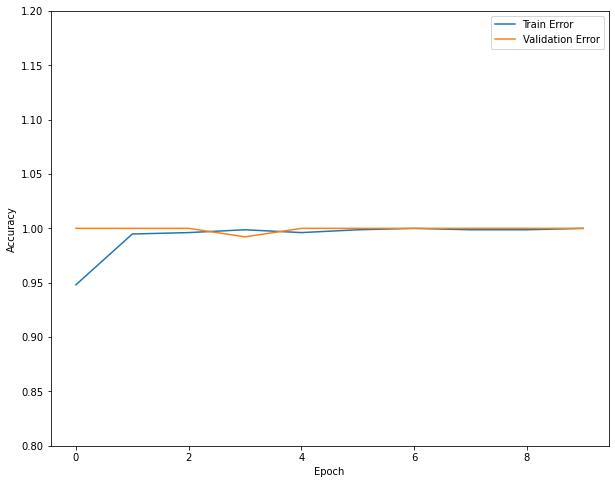

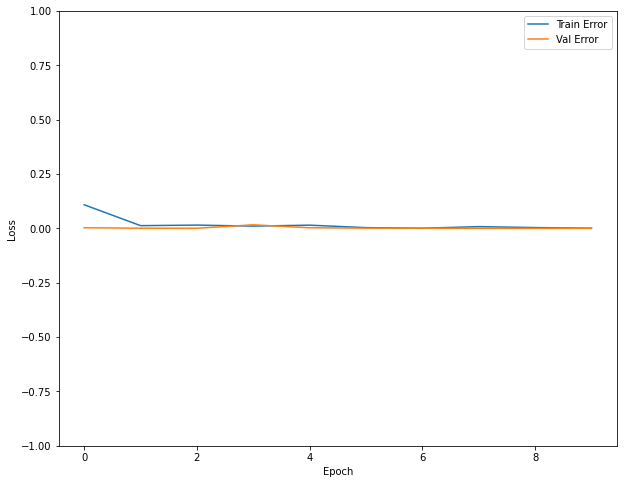

In [47]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(10,8))
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Validation Error')
  plt.ylim([0.8,1.2])
  plt.legend()

  plt.figure(figsize=(10,8))
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
  plt.ylim([-1,1])
  plt.legend()
  plt.show()

plot_history(history)

Here we can see that the model is train perfectly and is showing accuracy 1 and loss is minimum. It's Because we are working on pretrained models. Its an ideal model. One of the possiblity is that the images are well defined. 

## We can't differntiate between the 2 models because with or without Augmentation, model is giving accuracy of 1 and there is no misclassification.